# Transfer Learning

In [ ]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [3]:
import sys
import tensorflow as tf
import tensorflow.keras as keras
print("Python version %s.%s.%s" % sys.version_info[:3])
print("Tensorflow version %s" % tf.__version__)
print("Keras version %s" % keras.__version__)

Python version 3.7.1
Tensorflow version 1.13.1
Keras version 2.2.4-tf


## Download Data

We use Kaggle's [Dog Breed Identification competition](https://www.kaggle.com/c/dog-breed-identification) as an example.

Go to https://www.kaggle.com/c/dog-breed-identification/data, press the `Download All` button to download your data.

Move the loaded zip file into your local folder. Then unzip the file.

You should see 4 decompressed files in your folder. Move them to 'Assignment' folder and now you are safe to drop the zip file.

## Load Metadata

Use `pandas` to read (ID, labels) into `pandas.DataFrame`

In [4]:
import pandas as pd
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


See label distribution

In [5]:
labels['breed'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
leonberg                          106
cairn                             106
japanese_spaniel                  105
beagle                            105
blenheim_spaniel                  102
australian_terrier                102
miniature_pinscher                102
irish_wolfhound                   101
saluki                             99
lakeland_terrier                   99
papillon                           96
norwegian_elkhound                 95
whippet                            95
siberian_husky                     95
pug         

Here's a sample output, where each row is an image with uniform probability distribution among the 120 dog classes

In [6]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


Extract the column names, which are the classes

In [7]:
num_train_images = labels.shape[0]
print('num_train_images:', num_train_images)
breed = sample.columns[1:]
print('breed:', breed)
num_classes = len(breed)
print('num_classes:', num_classes)

num_train_images: 10222
breed: Index(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller', 'australian_terrier',
       'basenji', 'basset', 'beagle',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=120)
num_classes: 120


## Load Images

Now, extract the training data and test data

You should see two folders `train` and `test` in your assignment folder. 

Now, write a function that extracts images (hint: you may refer back to pretrained.ipynb)

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_width = 224

def get_image(filename):
    ########################################################################
    # TODO: Your code here...
    original = load_img(filename, target_size=(224, 224))
    return original
    ########################################################################

Test your function by running the test code below:

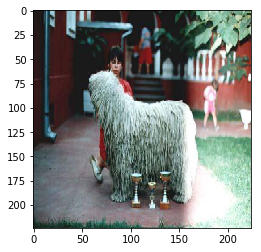

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

image = get_image('train/0a001d75def0b4352ebde8d07c0850ae.jpg')
plt.imshow(np.uint8(image))
plt.show()

In [10]:
x_train = np.zeros((num_train_images, img_width, img_width, 3), dtype=np.uint8)
y_train = np.zeros((num_train_images, num_classes), dtype=np.uint8)

count = 0

for i in range(num_train_images):
    x_train[i] = get_image('train/%s.jpg' % labels['id'][i])
    pos_arrays = (breed == labels['breed'][i]).nonzero() # recall that breed is the array of classes
    pos = pos_arrays[0][0]
    y_train[i][pos] = 1
    count += 1
    if(count % 1000 == 0): print(count, 'images loaded')

1000 images loaded
2000 images loaded
3000 images loaded
4000 images loaded
5000 images loaded
6000 images loaded
7000 images loaded
8000 images loaded
9000 images loaded
10000 images loaded


In [11]:
x_train.shape

(10222, 224, 224, 3)

## Method 1: get the features, and use them in a new network

Pretrained models provide the last layer of features that can be used for your task, here we get Resnet50's features

In [12]:
from tensorflow.keras.applications import resnet50

x_train = resnet50.preprocess_input(x_train) # preprocess the images properly (e.g., minus the mean image)

In [13]:
model_resnet50 = resnet50.ResNet50(weights='imagenet', include_top=False)
# include_top=False --> do not load the last FC layer

Instructions for updating:
Colocations handled automatically by placer.


/Users/kumaar7/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [14]:
#x_train_test=x_train[0:3]
#x_train_test.shape
x_train.shape
#plt.imshow(np.uint8(x_train[1]))


(10222, 224, 224, 3)

In [15]:
#x_train_mini=np.expand_dims(x_train_test, axis=0)
#features = model_resnet50.predict(x_train_test, batch_size=1, verbose=1)
features = model_resnet50.predict(x_train, batch_size=64, verbose=1)

10222/10222 [==============================] - 870s 85ms/sample


In [16]:
features.shape

(10222, 7, 7, 2048)

You can see that for each of the 10222 images, we get 2048 filters each of size 7 x 7

We can now regard our input as 10222 images of size 7 x 7 x 2048, and train a new network

In [17]:
# Using 7 x 7 x 2048 features as input to an FC layer leads to many parameters, and may overfit for small dataset
# Our solution is to use global pooling: pooling over every 7 x 7 images, to obtain 2048 features only
# -> ref: https://arxiv.org/pdf/1312.4400.pdf Sec 3.2

from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Activation, BatchNormalization

# define the network
# NOTE:
# here we use "output = Layer(configs) (input)" + model(inputs, outputs)
# you may also use model.add(layer) when building your own sequential model
inputs = Input(shape = (7, 7, 2048)) # to take 7 x 7 x 2048 images
x = GlobalAveragePooling2D()(inputs) # to convert to 2048 feagures
x = Dropout(0.5)(x) # add a dropout layer
x = Dense(500)(x) # add a dense layer, but not adding activation so that we can add batch-norm first
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x) # add a dropout layer
# Softmax layer to the output classes
predictions = Dense(num_classes, activation='softmax')(x) # arg1 is: units = dimensionality of the output space.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
from tensorflow.keras.models import Model

model = Model(inputs=inputs, outputs=predictions) # specify what is network input, and what is network output
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 7, 2048)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1024500   
_________________________________________________________________
batch_normalization_v1 (Batc (None, 500)               2000      
_________________________________________________________________
activation_49 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [19]:
# Assign loss function (over the output), optimizer algorithm, etc.
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [20]:
# Let's use first 10000 images for training, last 222 for validation
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',  patience=3, verbose=1)
# stop if loss does not improve for 3 iterations

model.fit(features[:10000], y_train[:10000], batch_size=128, epochs=30, 
              validation_data=(features[10000:], y_train[10000:]), callbacks=[early_stop], verbose=1)

Train on 10000 samples, validate on 222 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
10000/10000 [==============================] - 7s 690us/sample - loss: 3.2894 - acc: 0.2675 - val_loss: 1.3735 - val_acc: 0.6802
Epoch 2/30
10000/10000 [==============================] - 5s 484us/sample - loss: 1.6204 - acc: 0.5711 - val_loss: 0.9930 - val_acc: 0.7477
Epoch 3/30
10000/10000 [==============================] - 5s 505us/sample - loss: 1.2431 - acc: 0.6479 - val_loss: 0.8911 - val_acc: 0.7658
Epoch 4/30
10000/10000 [==============================] - 5s 505us/sample - loss: 1.0618 - acc: 0.6910 - val_loss: 0.8314 - val_acc: 0.7342
Epoch 5/30
10000/10000 [==============================] - 5s 510us/sample - loss: 0.9553 - acc: 0.7161 - val_loss: 0.7779 - val_acc: 0.7568
Epoch 6/30
10000/10000 [==============================] - 5s 503us/sample - loss: 0.8589 - acc: 0.7428 - val_loss: 0.7751 - val_acc: 0.7523
Epoch 7/30
10000/10000 [==============================] - 5s 505

In [21]:
# save it to disk
model.save('model1.h5') # you may try load_model.ipynb to see how it's loaded (not required)

## Test

just on one image for simplicity

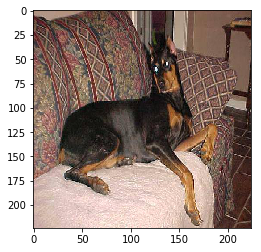

In [22]:
test_img = get_image('test/1ad4c5df263f643a44e577e5b146bd67.jpg')
plt.imshow(np.uint8(test_img))
plt.show()

In [23]:
from keras.applications.imagenet_utils import decode_predictions

image_batch = np.expand_dims(test_img, axis=0)
image_batch = resnet50.preprocess_input(image_batch)
feature_input = model_resnet50.predict(image_batch)
predictions = model.predict(feature_input)
pos = np.argmax(predictions)
breed[pos]

Using TensorFlow backend.


'miniature_pinscher'

## Method 2: graft your last few layers to pre-trained model, and freeze previous layers

In [24]:
base_model = resnet50.ResNet50(weights='imagenet', include_top=False) # we have not provided the input images yet
# we now freeze ResNet50's layers
for layer in base_model.layers:
    layer.trainable = False 
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [25]:
# now we bind the data for actual training - this may take a long while...
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',  patience=3, verbose=1)

model.fit(x_train[:10000], y_train[:10000], batch_size=128, epochs=2, # just observe how round 2 looks like 
              validation_data=(x_train[10000:], y_train[10000:]), callbacks=[early_stop], verbose=1)

Train on 10000 samples, validate on 222 samples
Epoch 1/2
10000/10000 [==============================] - 1137s 114ms/sample - loss: 2.7329 - acc: 0.3929 - val_loss: 1.2927 - val_acc: 0.6351
Epoch 2/2
10000/10000 [==============================] - 1115s 111ms/sample - loss: 1.0176 - acc: 0.7541 - val_loss: 1.0721 - val_acc: 0.6757


You can see that even though layers are freezed, later epochs are not faster as forward propagation is done again and again. So method 1 wins !

## Now, try to use features from multiple pretrained model

* combine its feature with those of ResNet50
* you may concatenate features after the global average pooling
* if you use method 1, numpy.concatenate should work
* if you use method 2, consider tensorflow.keras.layers.Concatenate (obviously will be much slower here when freezing a pretrained model, but could be useful if you build/train a model from scratch)
* use numpy.flip to flip your images so that you get more training data

In [26]:
########################################################################
# TODO: Your code here...
from tensorflow.keras.applications import inception_v3, vgg16
from tensorflow.keras.layers import Concatenate
base_model_resnet = resnet50.ResNet50(weights='imagenet', include_top=False) # we have not provided the input images yet
base_model_inception = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 
base_model_vgg16 = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Using method 2
# we now freeze ResNet50's layers
for layer in base_model_resnet.layers:
    layer.trainable = False 
for layer in base_model_inception.layers:
    layer.trainable = False 
for layer in base_model_vgg16.layers:
    layer.trainable = False 
x1 = base_model_resnet.output
x1 = GlobalAveragePooling2D()(x1)
x2 = base_model_inception.output
x2 = GlobalAveragePooling2D()(x2)
x3 = base_model_vgg16.output
x3 = GlobalAveragePooling2D()(x3)
x = Concatenate()([x1, x2, x3])
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=[base_model_resnet.input, base_model_inception.input, base_model_vgg16.input], outputs=predictions)

# now we bind the data for actual training - this may take a long while...
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',  patience=3, verbose=1)

# Flip and augment the data
x_augmented = np.append(x_train, np.flip(x_train, 1), axis=0)
y_augmented = np.append(y_train, np.flip(y_train, 1), axis=0)

# Keep 95% of the data for training and 5% for validation
num_training_samples = int(0.95*x_augmented.shape[0])
model.fit([x_augmented[:num_training_samples], x_augmented[:num_training_samples], x_augmented[:num_training_samples]], 
          y_augmented[:num_training_samples], 
          batch_size=128, 
          epochs=2,
          validation_data=([x_augmented[num_training_samples:], x_augmented[num_training_samples:], x_augmented[num_training_samples:]], y_augmented[num_training_samples:]), 
          callbacks=[early_stop], verbose=1)
########################################################################

Train on 19421 samples, validate on 1023 samples
Epoch 1/2
19421/19421 [==============================] - 10216s 526ms/sample - loss: 3.9210 - acc: 0.2671 - val_loss: 14.0810 - val_acc: 0.0293
Epoch 2/2
19421/19421 [==============================] - 10123s 521ms/sample - loss: 1.7598 - acc: 0.5671 - val_loss: 15.1100 - val_acc: 0.0127
